In [1]:
import os

import pandas as pd
import autonormalize as an

In [2]:
crime_df = pd.read_csv(os.path.join(os.getcwd(), 'autonormalize/downloads/crime.csv'))
crime_df = crime_df.drop(columns=crime_df.columns[10:])
crime_df = crime_df.dropna()
crime_df = crime_df.drop_duplicates()
print("Rows: "+ str(crime_df.shape[0]))
print("Columns: " + str(crime_df.shape[1]))
crime_df.head(3)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Rows: 638454
Columns: 10


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter


In [3]:
deps_approx = an.find_dependencies(crime_df, 0.94)
print(deps_approx)

100%|██████████| 9/9 [10:22<00:00, 67.62s/it] 


 --> Record ID
 {Record ID}  {Agency Name,State}  {City,Agency Name}  {Agency Name,Agency Type}  --> Agency Code
 {Record ID}  {Agency Code}  --> Agency Name
 {Record ID}  {Agency Name}  {Agency Code}  --> Agency Type
 {Record ID}  {Agency Name}  {Agency Code}  --> City
 {Record ID}  {City,Year,Crime Type,Month}  {Agency Name,Year}  {Incident,City,Year,Month}  {City,Agency Name}  {City,Agency Type,Year}  {Agency Code}  {Agency Name,Agency Type}  --> State
 {Record ID}  --> Year
 {Record ID}  --> Month
 {Record ID}  --> Incident
 {Record ID}  {City}  {Month}  {State}  {Year}  {Incident}  {Agency Name}  {Agency Code}  {Agency Type}  --> Crime Type


In [4]:
groupings = an.normalize_dependencies(deps_approx)
for grp in groupings:
    print('\n~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~\n')
    print(grp)


~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~

 --> Record ID
 {Record ID}  --> Agency Code
 {Record ID}  --> Year
 {Record ID}  --> Month
 {Record ID}  --> Incident

~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~

 {Agency Name}  --> Agency Code
 {Agency Code}  --> Agency Name
 {Agency Name}  {Agency Code}  --> Agency Type
 {Agency Name}  {Agency Code}  --> City
 {Agency Code}  {Agency Name}  --> State

~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~

 --> Agency Type
 {Agency Type}  --> Crime Type


In [3]:
entityset = an.auto_entityset(crime_df, name="crime records")

100%|██████████| 9/9 [03:10<00:00, 26.64s/it]


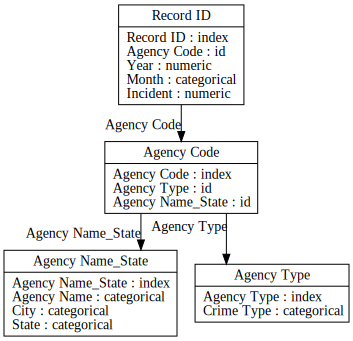

In [10]:
entityset.plot()